In [1]:
#pip install seaborn

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
video=pd.read_csv('C:\\Assignments\\Stats101\\Videos5.csv')

In [4]:
video.head(3)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...


In [5]:
#How long does it take for the video to get trending
video.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40881 entries, 0 to 40880
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40881 non-null  object
 1   trending_date           40881 non-null  object
 2   title                   40881 non-null  object
 3   channel_title           40881 non-null  object
 4   category_id             40881 non-null  int64 
 5   publish_time            40881 non-null  object
 6   tags                    40881 non-null  object
 7   views                   40881 non-null  int64 
 8   likes                   40881 non-null  int64 
 9   dislikes                40881 non-null  int64 
 10  comment_count           40881 non-null  int64 
 11  thumbnail_link          40881 non-null  object
 12  comments_disabled       40881 non-null  bool  
 13  ratings_disabled        40881 non-null  bool  
 14  video_error_or_removed  40881 non-null  bool  
 15  de

Claening Date time format

In [6]:
import datetime
from datetime import datetime

In [7]:
video['trending_date']

0        17.14.11
1        17.14.11
2        17.14.11
3        17.14.11
4        17.14.11
           ...   
40876    18.14.06
40877    18.14.06
40878    18.14.06
40879    18.14.06
40880    18.14.06
Name: trending_date, Length: 40881, dtype: object

In [8]:
video['trending_date']=video['trending_date'].map(lambda x:datetime.strptime(x, '%y.%d.%m'))

In [9]:
video['publish_time']=video['publish_time'].map(lambda x: x.split('T')[0]).map(lambda x:datetime.strptime(x, '%Y-%m-%d'))

In [10]:
video['publish_time']=pd.to_datetime(video['publish_time'])

In [11]:
trending_duration=(video['trending_date']-video['publish_time']).dt.days

checking distribution of views

<Axes: ylabel='Density'>

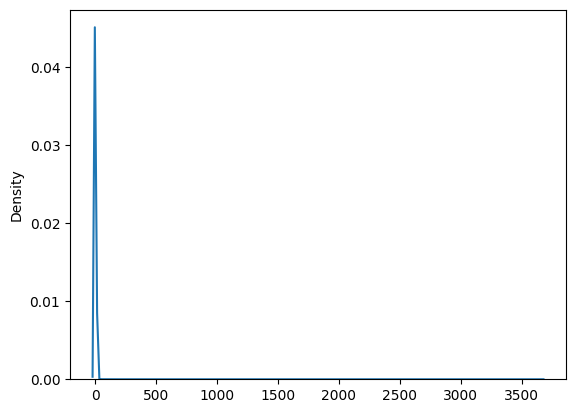

In [12]:
sns.kdeplot(trending_duration)

In [13]:
print('avg time in days for video to get trending is {}'.format(np.ceil(trending_duration.mean())))
print('median of trending duration is',(trending_duration).median())

avg time in days for video to get trending is 4.0
median of trending duration is 1.0


In [14]:
len(trending_duration)#total videos uploaded

40881

In [15]:
len(trending_duration[trending_duration>3]) #to videos which started trending more than 3 days of publishing

3273

In [16]:
#So on an avrage it takes 1 to 4 days for video to get trending but most videos took more than 3 days to get trending

In [17]:
#Q2.How is this duration changes across the two years

In [18]:
video['publish_time'].dt.year.value_counts()

2018    30936
2017     9900
2016       13
2013        9
2015        7
2014        6
2008        5
2010        3
2009        1
2012        1
Name: publish_time, dtype: int64

In [19]:
past_two_year=video['publish_time'].dt.year[video['publish_time'].dt.year>2015] #filtering videos published after 2016

Text(0, 0.5, 'Number of days to get Trending')

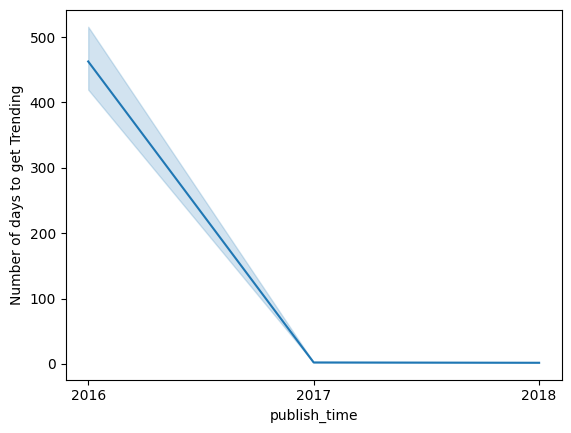

In [23]:
sns.lineplot(x=past_two_year,y=trending_duration)
plt.xticks([2016,2017,2018])
plt.ylabel('Number of days to get Trending')

we can observe drastic dicline in the duration required for video to get trending from 2016 to 2018

In [24]:
#Q3.Channels having multiple trending videos and how many times

In [25]:
trending_by_channel=video['channel_title'].value_counts()#number of videos uploaded by each channel

<Axes: >

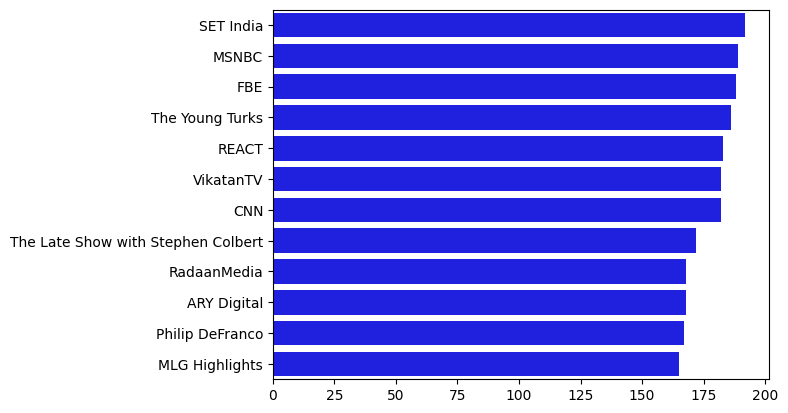

In [26]:
sns.barplot(y=trending_by_channel[trending_by_channel>1].head(12).index,
            x=trending_by_channel[trending_by_channel>1].head(12).values,color='Blue')

Chennel 'Troom Troom FR has higest trending videos followed by Elhiwar Ettounsi'

In [27]:
#Analysing views and comment

<Axes: xlabel='comment_count', ylabel='views'>

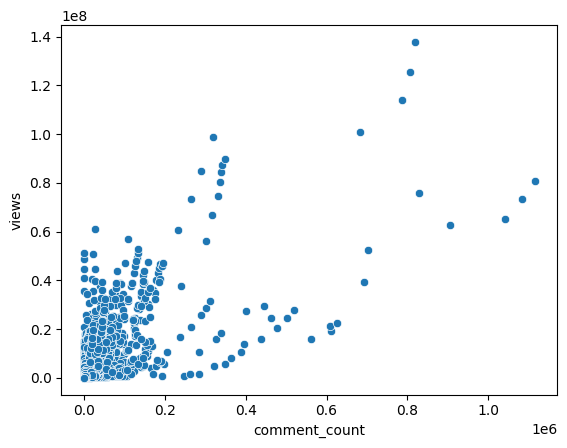

In [28]:
sns.scatterplot(y=video['views'],x=video['comment_count'])

In [29]:
#Comments are not contributing that much for views 

<Axes: xlabel='likes', ylabel='views'>

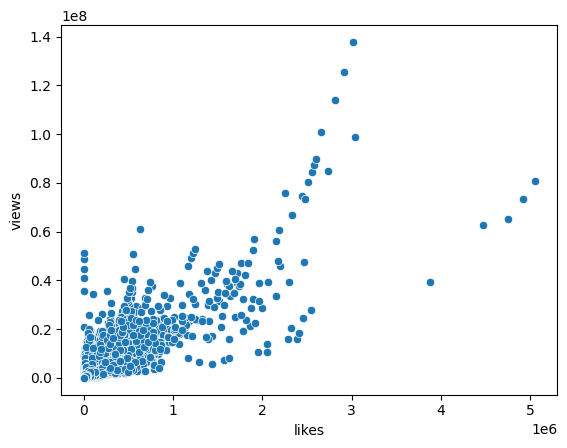

In [30]:
sns.scatterplot(y=video['views'],x=video['likes'])

Views increase with more likes 

<Axes: >

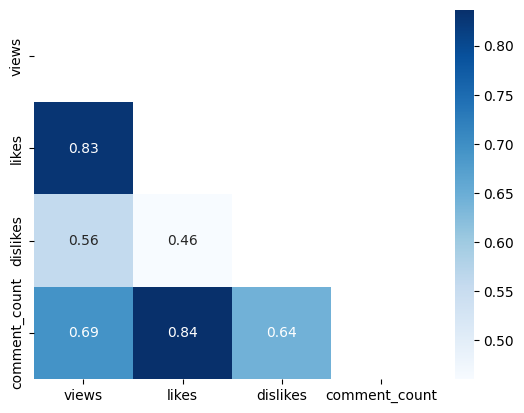

In [31]:
sns.heatmap(video[['views','likes','dislikes','comment_count']].corr(),cmap='Blues',annot=True,
           mask=np.triu(video[['views','likes','dislikes','comment_count']].corr()))

In [32]:
#

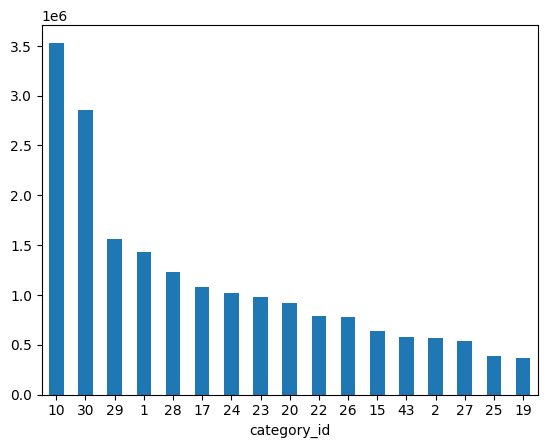

In [39]:
video.groupby(by=['category_id'])['views'].mean().sort_values(ascending=False).plot(kind='bar')
plt.xticks(rotation=360);

In [34]:
video['category_id'].value_counts()

24    13451
25     4159
22     4105
23     3773
10     3731
17     2787
1      2060
26     2007
20     1344
28     1155
27      991
19      392
15      369
2       353
43      124
29       74
30        6
Name: category_id, dtype: int64